(100, 100)


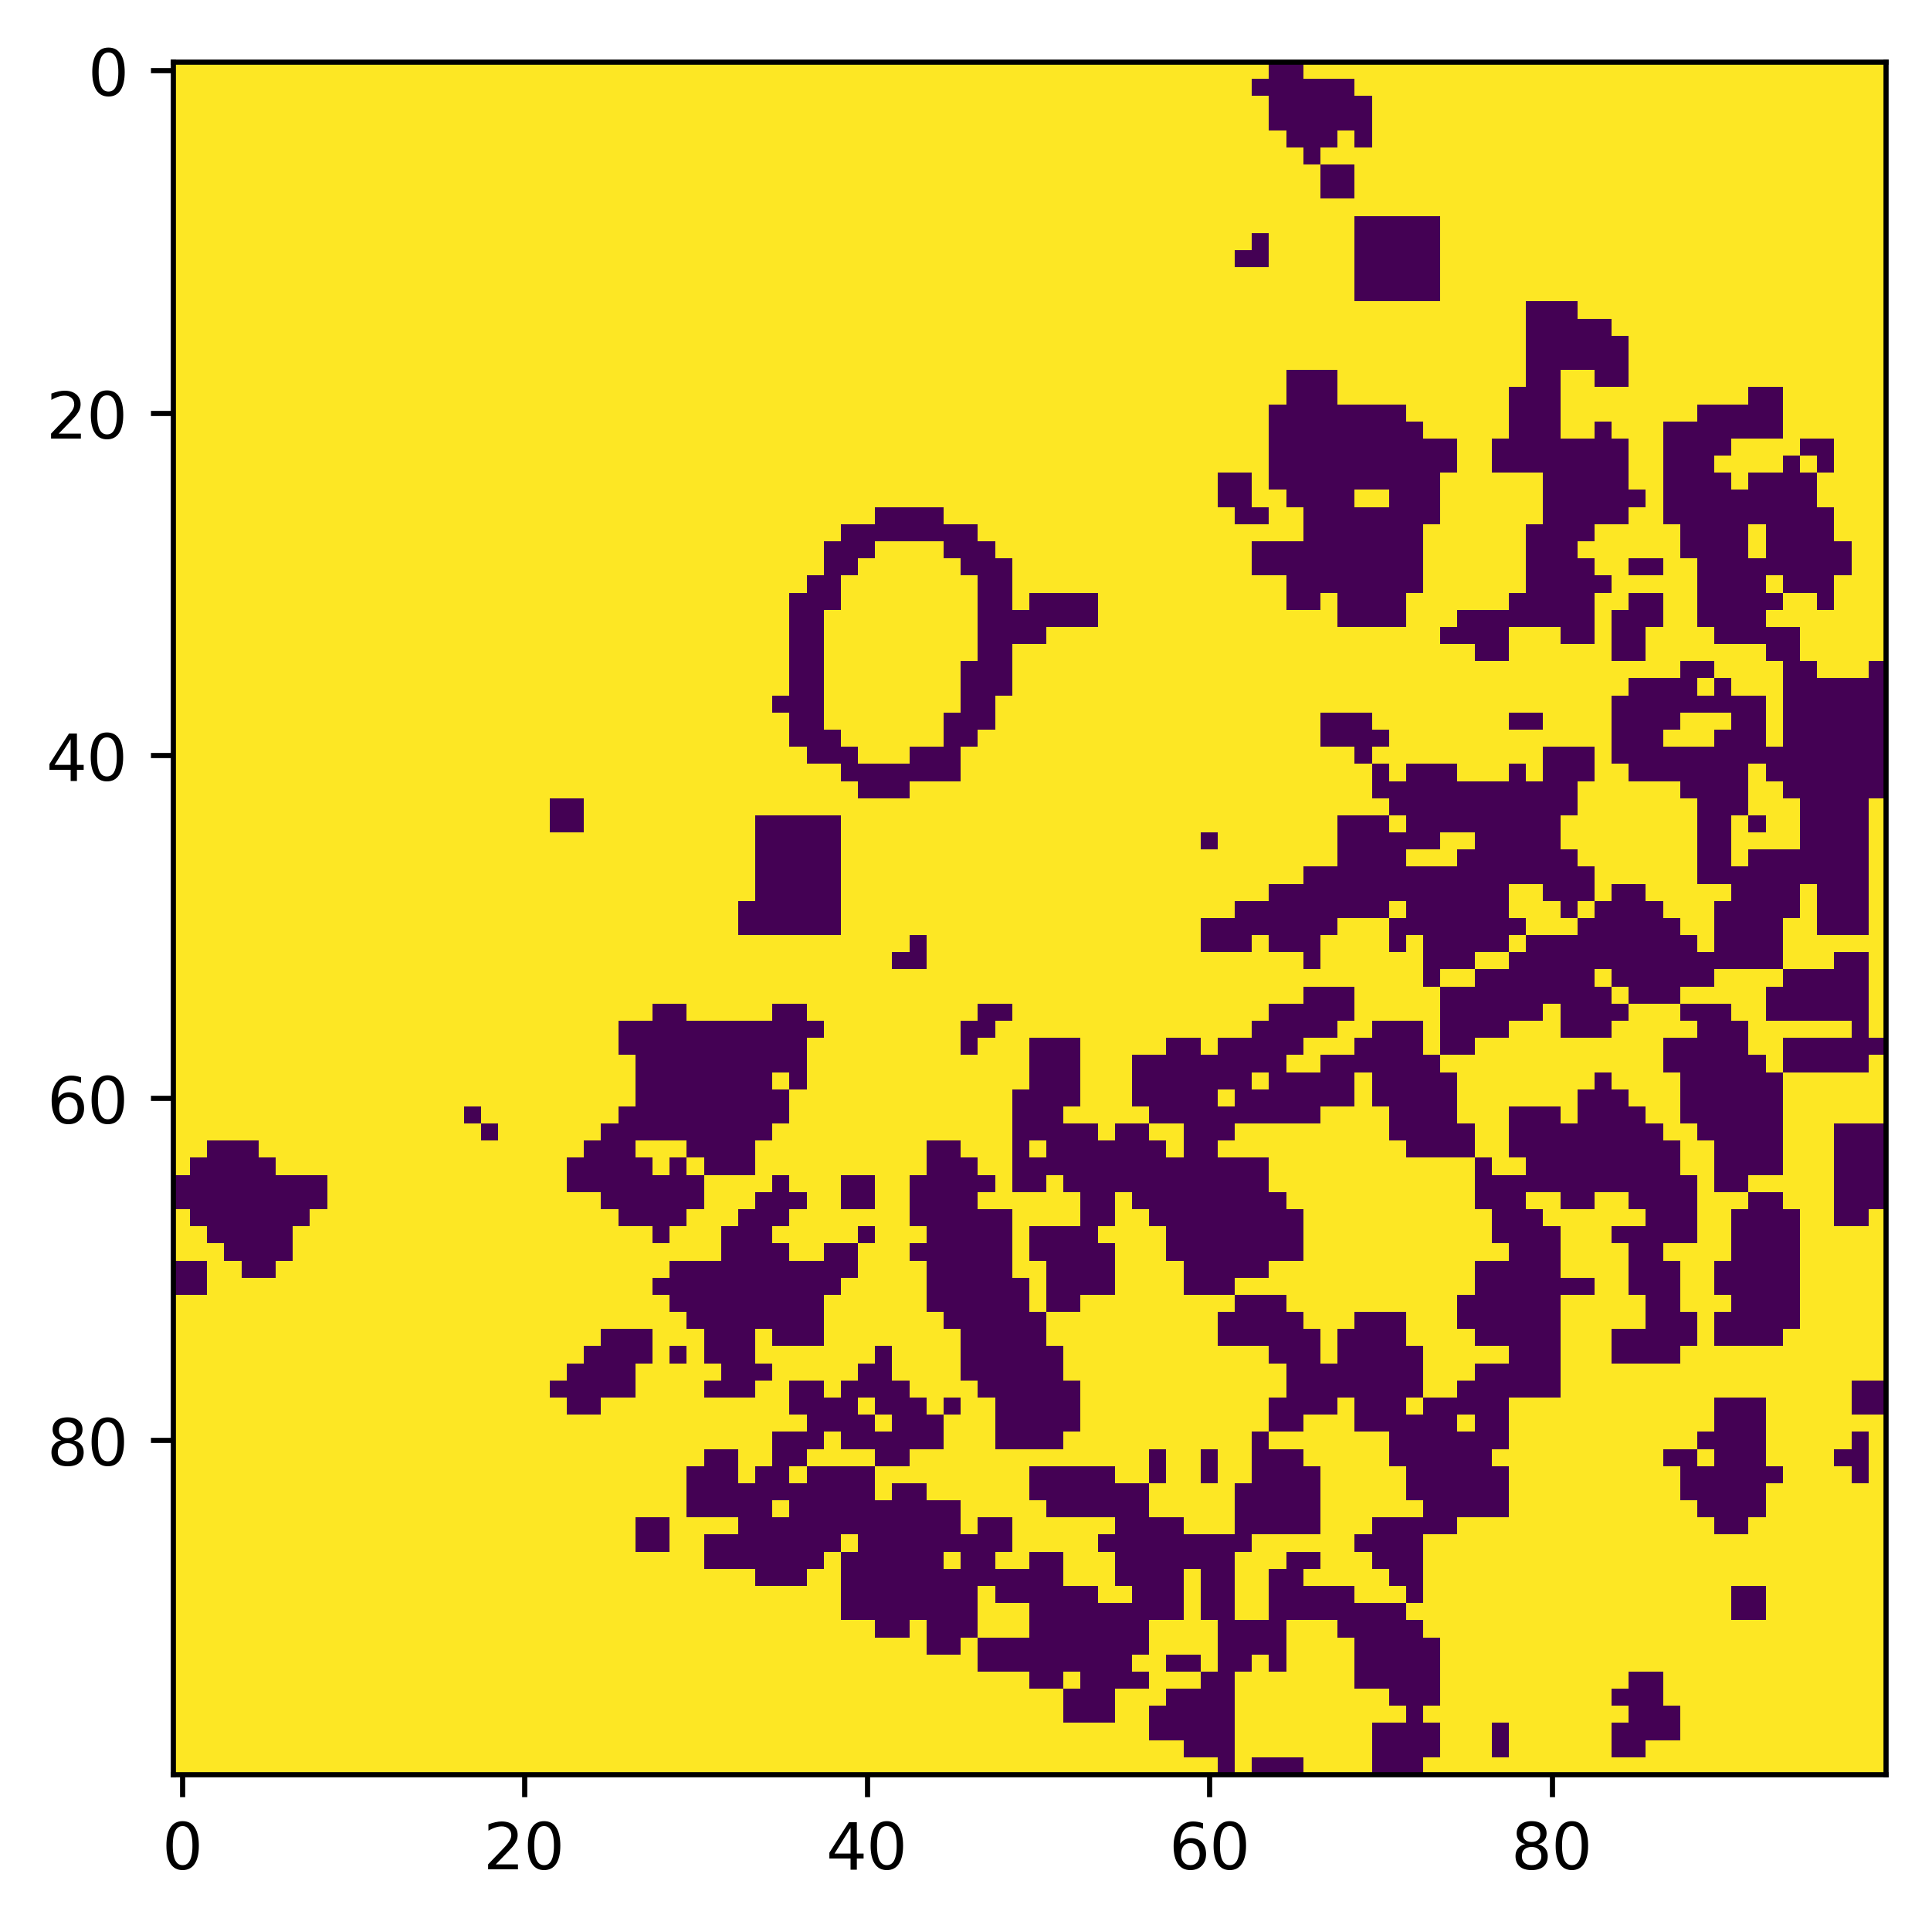

In [19]:
import numpy as np
import matplotlib.pylab as plt 
import imageio.v3 as iio
import networkx as nx
from itertools import count


def graph_atributo(G,atributo,label=False):
    plt.figure(dpi=400)
    groups = set(nx.get_node_attributes(G,atributo).values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[G.nodes[n][atributo]] for n in nodes]

    # drawing nodes and edges separately so we can capture collection for colobar
    pos = nx.spring_layout(G,iterations=400)
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    lc = nx.draw_networkx_labels(G, pos,font_size=8)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=100, cmap=plt.cm.jet)
    
    plt.colorbar(nc)
    plt.axis('off')
    plt.show()

def matriz_nn(n):
    nn=n*n
    M=np.zeros((nn,nn),dtype=int)
    
    for i in range(nn):
        for j in range(nn):
            if i+n==j or i-n==j:
                M[i,j]=1


            if i+1==j or i-1==j:
                M[i,j]=1

            if i==j:
                # print(M[i,j])
                if i!=nn-1:
                    
                    if  i%n==0 and i!=0:
                        M[i-1,j]=0
                        M[i,j-1]=0

    return M
def sort_dict_value(dic):    
    return sorted(dic.items(), key=lambda x:x[1])

im = iio.imread('./Environment/200_200.png')
mapa=np.array(im)
mapa_b=mapa>250
mapa_c=mapa_b[:, :, 0]*1
np.savetxt("./Environment/Acceso.csv", mapa_c, delimiter=",",fmt='%0d')
print(mapa_c.shape)
plt.figure(dpi=600)
plt.imshow(mapa_c)

In [20]:
G=nx.Graph()
n=mapa_c.shape[0]
nx.set_node_attributes(G, 0, "Aceso")
for i in range(mapa_c.shape[0]):
    for j in range(mapa_c.shape[1]):
        k=str(i*n+j)
        G.add_node(k)
        G.nodes[k]["Aceso"]=mapa_c[i,j]

print(mapa_c.shape)
for i in range(mapa_c.shape[0]):
    for j in range(mapa_c.shape[1]):

            k=str(i*n+j)
            kd=str((i+1)*n+j)
            kb=str(i*n+(j+1))
            k_diagonal1=str((i+1)*n+(j+1))
            k_diagonal2=str((i+1)*n+(j-1))
            
            if not i+1==mapa_c.shape[0] and not j+1==mapa_c.shape[1]:
                 G.add_edge(k,k_diagonal1)

            if not i+1==mapa_c.shape[0] and j!=0:
                 G.add_edge(k,k_diagonal2)
                 print(k,k_diagonal2)

            if i+1==mapa_c.shape[0]:
                if j+1<mapa_c.shape[1]:
                    G.add_edge(k,kb)
            elif j+1==mapa_c.shape[1]:
                
                G.add_edge(k,kd)

            else :

                G.add_edge(k,kd)
                G.add_edge(k,kb)

graph_atributo(G,"Aceso")

(100, 100)
1 100
2 101
3 102
4 103
5 104
6 105
7 106
8 107
9 108
10 109
11 110
12 111
13 112
14 113
15 114
16 115
17 116
18 117
19 118
20 119
21 120
22 121
23 122
24 123
25 124
26 125
27 126
28 127
29 128
30 129
31 130
32 131
33 132
34 133
35 134
36 135
37 136
38 137
39 138
40 139
41 140
42 141
43 142
44 143
45 144
46 145
47 146
48 147
49 148
50 149
51 150
52 151
53 152
54 153
55 154
56 155
57 156
58 157
59 158
60 159
61 160
62 161
63 162
64 163
65 164
66 165
67 166
68 167
69 168
70 169
71 170
72 171
73 172
74 173
75 174
76 175
77 176
78 177
79 178
80 179
81 180
82 181
83 182
84 183
85 184
86 185
87 186
88 187
89 188
90 189
91 190
92 191
93 192
94 193
95 194
96 195
97 196
98 197
99 198
101 200
102 201
103 202
104 203
105 204
106 205
107 206
108 207
109 208
110 209
111 210
112 211
113 212
114 213
115 214
116 215
117 216
118 217
119 218
120 219
121 220
122 221
123 222
124 223
125 224
126 225
127 226
128 227
129 228
130 229
131 230
132 231
133 232
134 233
135 234
136 235
137 236
138 237
1

KeyboardInterrupt: 

<Figure size 2560x1920 with 0 Axes>

In [16]:



Ac=sort_dict_value(nx.get_node_attributes(G,"Aceso"))
for node_p in Ac:
    if node_p[1]==0:
        node=node_p[0]
        edges=list(G.edges(node))
        for edge in edges:
            print(edge[1])
            G.remove_edge(edge[0],edge[1])
A = nx.to_numpy_array(G)
#print(A)
plt.show()
M=matriz_nn(4)
np.savetxt("R.csv", A, delimiter=",",fmt='%0d')

11
10
1
1
2
10
22
20
21
12
16
17
18
26
38
36
37
28
17
18
19
39
37
38
29
21
22
23
31
43
41
42
33
26
36
48
46
47
38
29
49
47
48
39
30
31
40
52
50
51
42
31
33
53
51
52
43
33
34
54
52
53
44
51
63
61
62
53
46
47
48
56
68
66
67
58
55
56
65
77
75
76
67
56
58
78
76
77
68
68
76
88
86
87
78


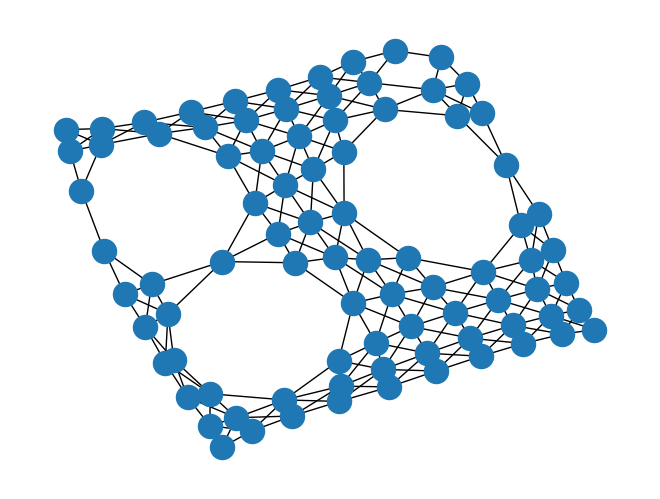

In [17]:
r=np.loadtxt('./R.csv',dtype="int",delimiter=',')
R = nx.from_numpy_array(r)
R.remove_nodes_from(list(nx.isolates(R)))
pos_r=nx.spring_layout(R,iterations=1000)
nx.draw(R,pos=pos_r)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23008\63506099.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  r2=np.loadtxt('./Environment/Matriz_adyacencia_mapa.csv',dtype="int",delimiter=',')


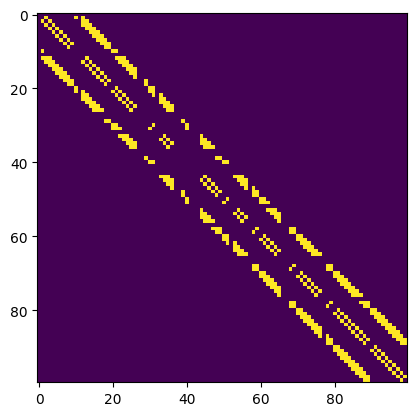

In [18]:
r1=np.loadtxt('./R.csv',dtype="int",delimiter=',')
r2=np.loadtxt('./Environment/Matriz_adyacencia_mapa.csv',dtype="int",delimiter=',')
r2[r2==9999]=0
# print(r2)

plt.imshow(r1+r2)

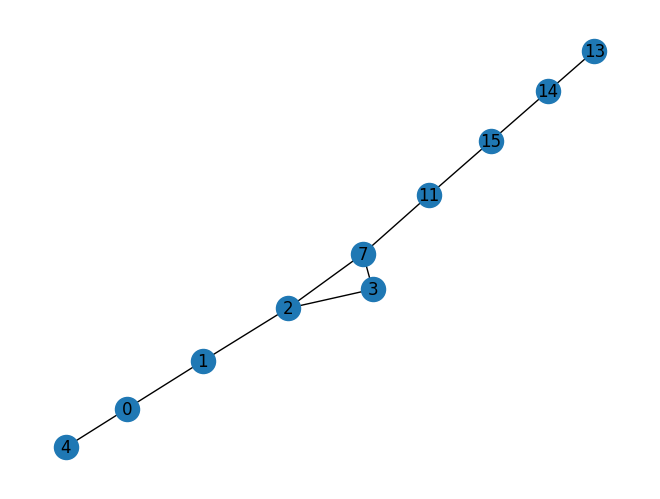

In [6]:

r=np.loadtxt('./Environment/Matriz_adyacencia_mapa.csv',dtype="int",delimiter=',')
r[r==9999]=0
R = nx.from_numpy_array(r)
R.remove_nodes_from(list(nx.isolates(R)))
pos_r=nx.spring_layout(R,iterations=1000)
nx.draw(R,pos=pos_r,with_labels=True)

[]


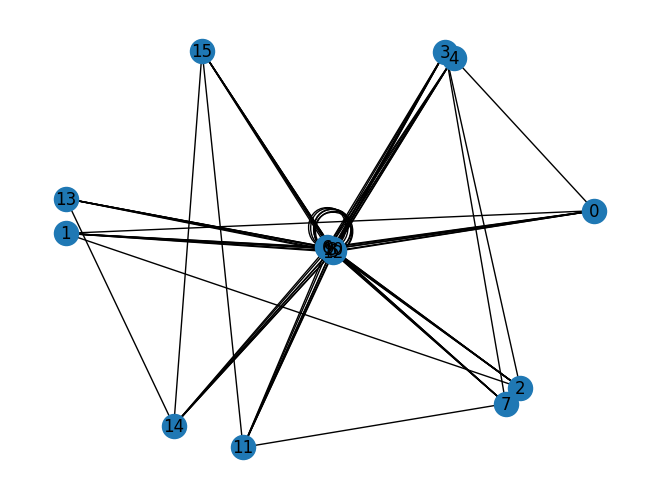

In [7]:
r=np.loadtxt('./Environment/Matriz_adyacencia_mapa.csv',dtype="int",delimiter=',')
R = nx.from_numpy_array(r)
R.remove_nodes_from(list(nx.isolates(R)))
print(list(nx.isolates(R)))
pos_r=nx.spring_layout(R,iterations=1000)
# print(nx.dijkstra_path(R, 1, 31))
nx.draw(R,pos=pos_r,with_labels=True)